In [1]:
import matplotlib
# %matplotlib inline
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
import matplotlib.pyplot as plt

import SUITPy as suit
import surfAnalysisPy as sa
import nibabel as nb
import nitools as nt

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am


import selective_recruitment.plotting as splotting
import selective_recruitment.scripts.script_overlap_map_wm as soverlap
import selective_recruitment.scripts.script_roi_similarity as ssimil
import selective_recruitment.plotting as splotting
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test
from matplotlib.colors import LinearSegmentedColormap
import PcmPy as pcm
from nilearn import plotting
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Correlation between forwards and backwards per load per phase

## Parcellation

In [ ]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

In [ ]:
roi_name = "D3R"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

## Parcellation divided into anterior and posterior

In [ ]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32AP", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

In [ ]:
# add a new field defining hemi and anterior vs posterior
D["half"] = D["roi_name"].str[-1]
D["hemi"] = D["roi_name"].str[2]
D = D.loc[D.roi != 0]
print(AnovaRM(data=D.loc[D.hemi == "R"], depvar='R_fwbw',
              subject='sn', within=["load", "phase", "half"], aggregate_func=np.mean).fit())

In [ ]:
roi_name = "D3R_A"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

In [ ]:
print(AnovaRM(data=DD, depvar='R_fwbw',
              subject='sn', within=["load", "phase"], aggregate_func=np.mean).fit())

(16, 16, 16)


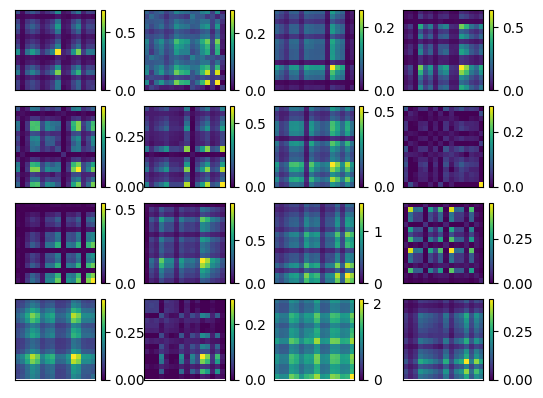

In [2]:
G, Ginf = ssimil.calc_G(center = False, subj = None)
print(G.shape)
pcm.plot_Gs(G,grid = None, labels=Ginf.region_name)
# plt.imshow(G, cmap = 'jet', vmin = G.min(), vmax = G.max())
# plt.colorbar()
# plt.clim([0, 0.3])
# ax.set_xticks(Ginf['region_id'].values)
# ax.set_yticks(Ginf['region_id'].values)
# ax.set_xticklabels(labels = Ginf['region_name'].values, rotation = 90)
# ax.set_yticklabels(labels = Ginf['region_name'].values, rotation = 0)

In [ ]:
# splotting.plot_MDS(W[:, 1], W[:, 2], Ginf, colors_D, text_size = 'small', text_weight = 'regular')